In [48]:
import yt
import netCDF4 as nc
import pyart
import matplotlib.pyplot as plt
import pygrib
import pandas as pd
import ipywidgets
import numpy as np

In [4]:
slab = pd.read_csv('ggy279_supplemental_files/TomoSlab_v1_2018/Output/sam_TO_SAM4.csv')

In [53]:
slab_np = np.array(slab)
slab_np

array([[-39.9912, -69.481 , 287.0731],
       [-39.9881, -69.3169, 304.8386],
       [-39.9861, -69.1235, 316.8268],
       ...,
       [-24.1729, -64.3243, 421.9132],
       [-24.2225, -62.7328, 617.5687],
       [-24.2497, -62.4173, 636.8344]])

In [5]:
import os
os. getcwd()

'/Users/tzacks2/Desktop/GradSchool/Summer22/yt_Summer_proj'

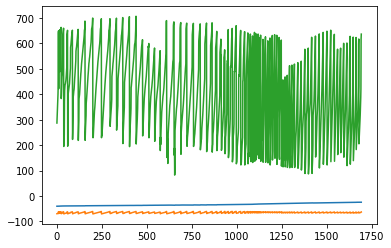

In [6]:
plt.figure()
plt.plot(slab)

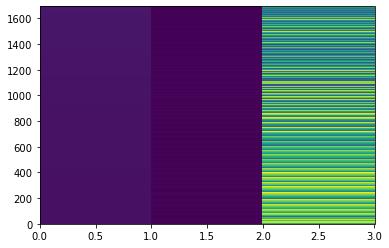

In [116]:
plt.pcolormesh(slab_np)

In [15]:
slab2017 = pd.read_csv('ggy279_supplemental_files/TomoSlab_v1_2018/Tomo_files/SAM4_P_2017.tomo',delimiter=' ')

In [18]:
slab2017.columns = ['lat','lon','time','depth']

In [34]:
slab2017

,lat,lon,time,depth
0,-46.439305,-84.393870,60.0,-0.000020
1,-46.309728,-84.365250,60.0,-0.000009
2,-46.180072,-84.336749,60.0,0.000003
3,-46.050338,-84.308366,60.0,0.000008
4,-45.920526,-84.280101,60.0,-0.000006
...,...,...,...,...
755364,-18.314810,-57.508592,1010.0,-0.625058
755365,-18.185128,-57.524200,1010.0,-0.654320
755366,-18.055523,-57.539775,1010.0,-0.660280
755367,-17.925995,-57.555319,1010.0,-0.666139


In [33]:
slab2017['time'].unique()

array([  60.,   95.,  130.,  165.,  200.,  240.,  280.,  320.,  365.,
        410.,  455.,  505.,  555.,  605.,  660.,  715.,  775.,  835.,
        895.,  940., 1010.])

In [96]:
time_dict = {}
for i in slab2017['time'].unique():
    x = (slab2017.loc[slab2017['time'] == i])
    print(x.columns)
#     time_dict[i]=x

Index(['lat', 'lon', 'time', 'depth'], dtype='object')
Index(['lat', 'lon', 'time', 'depth'], dtype='object')
Index(['lat', 'lon', 'time', 'depth'], dtype='object')
Index(['lat', 'lon', 'time', 'depth'], dtype='object')
Index(['lat', 'lon', 'time', 'depth'], dtype='object')
Index(['lat', 'lon', 'time', 'depth'], dtype='object')
Index(['lat', 'lon', 'time', 'depth'], dtype='object')
Index(['lat', 'lon', 'time', 'depth'], dtype='object')
Index(['lat', 'lon', 'time', 'depth'], dtype='object')
Index(['lat', 'lon', 'time', 'depth'], dtype='object')
Index(['lat', 'lon', 'time', 'depth'], dtype='object')
Index(['lat', 'lon', 'time', 'depth'], dtype='object')
Index(['lat', 'lon', 'time', 'depth'], dtype='object')
Index(['lat', 'lon', 'time', 'depth'], dtype='object')
Index(['lat', 'lon', 'time', 'depth'], dtype='object')
Index(['lat', 'lon', 'time', 'depth'], dtype='object')
Index(['lat', 'lon', 'time', 'depth'], dtype='object')
Index(['lat', 'lon', 'time', 'depth'], dtype='object')
Index(['la

In [71]:
time_dict

{60.0:              lat        lon  time     depth
 0     -46.439305 -84.393870  60.0 -0.000020
 1     -46.309728 -84.365250  60.0 -0.000009
 2     -46.180072 -84.336749  60.0  0.000003
 3     -46.050338 -84.308366  60.0  0.000008
 4     -45.920526 -84.280101  60.0 -0.000006
 ...          ...        ...   ...       ...
 35964 -18.314810 -57.508592  60.0  0.000118
 35965 -18.185128 -57.524200  60.0  0.000136
 35966 -18.055523 -57.539775  60.0  0.000152
 35967 -17.925995 -57.555319  60.0  0.000168
 35968 -17.796544 -57.570830  60.0  0.000184
 
 [35969 rows x 4 columns],
 95.0:              lat        lon  time     depth
 35969 -46.568802 -84.422611  95.0 -0.000015
 35970 -46.439305 -84.393870  95.0 -0.000019
 35971 -46.309728 -84.365250  95.0 -0.000020
 35972 -46.180072 -84.336749  95.0 -0.000018
 35973 -46.050338 -84.308366  95.0 -0.000017
 ...          ...        ...   ...       ...
 71934 -18.314810 -57.508592  95.0 -0.000067
 71935 -18.185128 -57.524200  95.0 -0.000058
 71936 -18.055

In [42]:
slab2017['depth'].min()

-8.03117

In [43]:
slab2017['lat'].min()

-47.373802

In [44]:
slab2017['lon'].min()

-84.422611

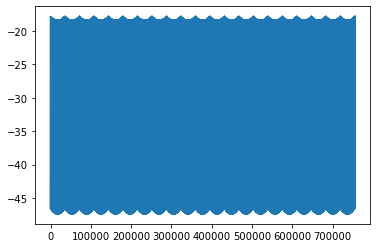

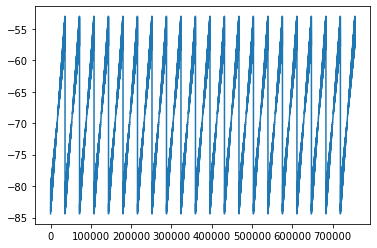

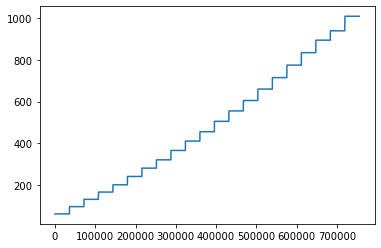

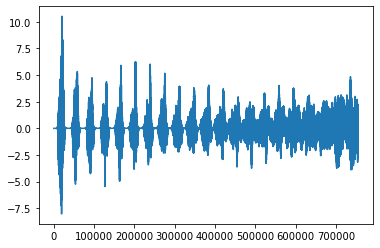

In [41]:
for i in slab2017:
    plt.figure()
    plt.plot(slab2017[i])

In [98]:
sam_slab1 = nc.Dataset('ggy279_supplemental_files/TomoSlab_v1_2018/Slab_files/sam_slab1.0_augmented.grd')

In [119]:
sam_slab1.variables['z'][:].data

array([[ 120.51709  ,  119.95406  ,  119.39073  , ..., -529.2517   ,
        -529.8198   , -530.38806  ],
       [ 120.39202  ,  119.81769  ,  119.244934 , ..., -529.37195  ,
        -529.94635  , -530.5221   ],
       [ 120.26599  ,  119.682304 ,  119.101746 , ..., -529.4947   ,
        -530.0744   , -530.65643  ],
       ...,
       [   2.6269662,    2.1710606,    1.7249993, ...,          nan,
                 nan,          nan],
       [   2.7793696,    2.3347197,    1.8983305, ...,          nan,
                 nan,          nan],
       [   2.9312072,    2.4995496,    2.0743551, ...,          nan,
                 nan,          nan]], dtype=float32)

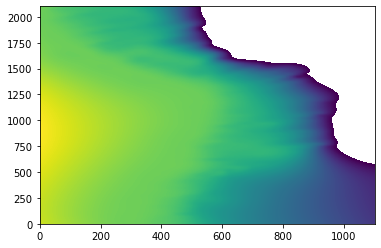

In [120]:
plt.pcolormesh(sam_slab1.variables['z'][:].data)

In [124]:
(sam_slab1.variables['x'][:]).min()

278.0